In [199]:
import pandas as pd
import numpy as np
DIR = "/home/aditya/Documents/adult_data.csv"
df = pd.read_csv(DIR,header = None)

df.columns = ["age","workclass","fnlwgt","education","education-num",
             "marital-status","occupation","relationship","race",
             "sex","capital-gain","capital-loss","hours-per-week",
             "native-country","salary"]

data = pd.get_dummies(df.iloc[:,0:13],drop_first=True)

data_adult = pd.concat([data,pd.DataFrame({"salary":df.iloc[:,14]})],sort = False,axis = 1)

X, y = data_adult.iloc[:,0:59].values, data_adult.iloc[:,59].values

In [200]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500,
                               random_state=1)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [201]:
labels = data_adult.columns[:-1]

In [202]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            labels[indices[f]],
                            importances[indices[f]]))

 1) fnlwgt                         0.172127
 2) age                            0.157309
 3) capital-gain                   0.105016
 4) marital-status_ Married-civ-spouse 0.090213
 5) hours-per-week                 0.085582
 6) education-num                  0.067036
 7) capital-loss                   0.033467
 8) marital-status_ Never-married  0.028867
 9) occupation_ Exec-managerial    0.018753
10) sex_ Male                      0.016884
11) relationship_ Not-in-family    0.016733
12) occupation_ Prof-specialty     0.015146
13) education_ Bachelors           0.011290
14) workclass_ Private             0.011213
15) relationship_ Own-child        0.010118
16) workclass_ Self-emp-not-inc    0.008623
17) relationship_ Wife             0.008201
18) education_ Masters             0.007921
19) relationship_ Unmarried        0.007750
20) race_ White                    0.007260
21) occupation_ Sales              0.006985
22) occupation_ Other-service      0.006778
23) occupation_ Craft-repair

In [203]:
X = df[["fnlwgt","age","capital-gain"]]

In [204]:
from sklearn.utils import resample
X_upsampled, y_upsampled = resample(X[y==1],y[y==1],replace = True,
                                   n_samples = X[y==0].shape[0],
                                   random_state = 0)
X_bal = np.vstack((X[y==0],X_upsampled))
y_bal = np.hstack((y[y==0],y_upsampled))

In [206]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_bal_sc = sc.fit_transform(X_bal)

/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/aditya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


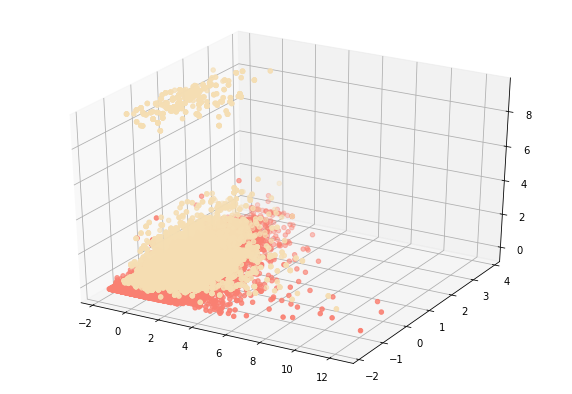

In [207]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X_bal_sc[y_bal==0,0],X_bal_sc[y_bal==0,1],X_bal_sc[y_bal==0,2],color = "salmon")
ax.scatter3D(X_bal_sc[y_bal==1,0],X_bal_sc[y_bal==1,1],X_bal_sc[y_bal==1,2],color = "wheat")
plt.show()

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal_sc,y_bal,test_size = 0.1, random_state = 1)

In [209]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear",multi_class="auto")
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6332928802588996

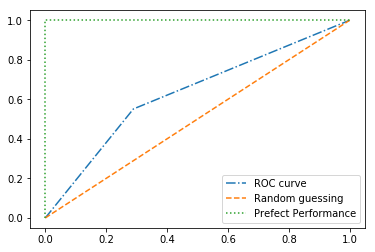

In [211]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,ls = "-.",label = "ROC curve")
plt.plot([0,1],[0,1],ls = "--",label = "Random guessing")
plt.plot([0,0,1],[0,1,1],ls = ":",label = "Prefect Performance")
plt.legend(loc = "best")
plt.show()

In [212]:
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#pca = LDA(n_components=2,solver='eigen', shrinkage='auto')
pca = PCA(n_components=2)
#pca = IncrementalPCA(n_components=2)
X_bal_sc_pca = pca.fit_transform(X_bal_sc,y_bal)

In [213]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_bal_sc_pca,y_bal,test_size = 0.1,random_state = 1)

In [214]:
lr.fit(X_train_pca,y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
y_pred_pca = lr.predict(X_test_pca)

In [216]:
accuracy_score(y_test_pca,y_pred_pca)

0.6547330097087378